<a href="https://colab.research.google.com/github/momo1606/Covid-19-Time-series-prediction-dashboard/blob/master/COVID_19_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install pygal


     |████████████████████████████████| 133kB 4.4MB/s 


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
#import pygal

In [ ]:
def get_data(y,typ):
  cases_mh=[100,15,88,67,148,110,121,149,117,229,210,187,235,344,350,226,288,119,328,553,472,553,431,778,394,811,440,522,728,597,583,1008,790,678,771,841,1233,1216,1089,1165,1278,1230,1026,1495,1602,1576,1606,2347,2033,2127,2250,2345,2940,2608,3041,2436,2091,2190,2598,2682,2940] #Cases daily MH 320,100
  cases_in=[236,404,701,598,553,603,417,652,540,678,1035,909,807,1206,1073,938,1006,992,1334,1554,1345,1384,1395,1684,1432,1990,1396,1543,1897,1718,1993,2293,2644,2553,3900,2958,3561,3390,3320,3277,4213,3604,3525,3722,3967,3790,4987,5242,4970,5611,5609,6088,6654,6767,6977,6535,6387,6566,7466,7964,8380] #Cases India 1436,236
  deaths_in=[6,7,18,15,10,24,12,28,17,33,40,34,34,37,38,37,23,43,27,36,47,50,41,37,57,49,48,62,73,67,73,71,83,72,195,126,89,103,95,128,97,87,122,134,100,103,120,157,134,140,132,148,137,147,154,146,170,194,175,265,193]  #Deaths in India daily 6
  deaths_mh=[2,1,7,6,6,13,7,12,8,25,13,17,21,12,18,9,7,7,10,12,9,19,18,14,18,22,19,27,31,32,27,26,36,27,35,34,34,43,37,48,53,36,53,54,44,49,67,63,51,76,65,64,63,60,58,60,97,105,85,116,99]   # Death in Maharastra Daily 2
  gen_male=[144,56,5,60,43,94,67,65,88,96,124,116,117,114,198,213,142,184,79,176,352,287,363,257,454,248,514,250,311,436,367,339,627,494,434,462,1098,749,791,724,706,1211,771,627,902,1014,976,1017,1484,1220,1338,1352,1513,1838,1604,1938,1526,1243,1402,1677,1685] #Males contracting Covid-19
  gen_female=[86,36,8,28,24,51,46,52,64,39,98,83,65,112,154,137,90,102,39,152,200,179,189,174,324,142,297,190,186,293,229,244,381,296,244,309,682,484,425,365,459,732,459,398,592,588,600,589,863,786,713,828,832,1102,1004,1103,910,848,785,920,998] #Females Contracting Covid-19

  dates=pd.date_range(start='4/1/2020', end='5/31/2020')
  days=[i for i in range(len(dates)) ]

  if y=='cin':
    y_list= cases_in
  if y=='cmh':
    y_list=cases_mh
  if y=='din':
    y_list=deaths_in
  if y=='dmh':
    y_list=deaths_mh
  if y=='gmale':
    y_list=gen_male
  if y=='gfemale':
    y_list=gen_female
      
  dataset=pd.DataFrame({'dates':dates,"y":y_list,'days':days})
  if typ=='cum':
    dataset["y"]=dataset["y"].cumsum()
  elif typ=='log':
    dataset["y"]=dataset["y"].cumsum()
    dataset["y"]=dataset["y"].apply(lambda x :np.log(x))
  elif typ=='dlog':
    dataset["y"]=dataset["y"].apply(lambda x :np.log(x))
  return dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
def poly_reg(dataset,typ,nxt=5):
  """
  A polynomial regression function with variable dataset containing X and y only
  and outputs a list of predictions
  """
  #dataset = pd.read_csv('ENTER_THE_NAME_OF_YOUR_DATASET_HERE.csv')
  X = dataset.iloc[:, :-1].values
  y = dataset.iloc[:, -1].values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
  poly_reg = PolynomialFeatures(degree = 3)
  X_poly = poly_reg.fit_transform(X_train)
  regressor = LinearRegression()
  regressor.fit(X_poly, y_train)
  y_pred = regressor.predict(poly_reg.transform(X_test))
  np.set_printoptions(precision=2)
  #print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
  print(r2_score(y_test, y_pred))
  preds=[]
  for i in range(nxt):
      if typ=='log' or typ=='dlog':
          preds.append(np.exp(regressor.predict(poly_reg.fit_transform([[len(dataset)]])))[0])
      else:
          preds.append(regressor.predict(poly_reg.fit_transform([[len(dataset)+i]]))[0])

  return preds


In [ ]:
from sklearn.linear_model import LinearRegression

def mul_linear_reg(dataset,typ,nxt=5):

  """
  A multinomial linear regression function with variable dataset containing X and y only
  and outputs a list of predictions
  """
  #dataset = pd.read_csv('ENTER_THE_NAME_OF_YOUR_DATASET_HERE.csv')
  X = dataset.iloc[:, :-1].values
  y = dataset.iloc[:, -1].values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
  regressor = LinearRegression()
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  np.set_printoptions(precision=2)
  #print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
  print(r2_score(y_test, y_pred))
  #Extrass
  preds=[]
  for i in range(nxt):
    if typ=='log' or typ=='dlog':
      preds.append(np.exp(regressor.predict(np.array([[len(dataset)+i]]))[0]))
    else:
      preds.append(regressor.predict(np.array([[len(dataset)+i]]))[0])
  return preds


In [ ]:
from fbprophet import Prophet
def prophet_pred(dataset,typ,nxt=5):
  """
  This uses facebook prophet to forecast the time series.
  Ds and Y should be the only input
  Ds is dates in str type like "29 Apr 2020" or the general format yyyy:dd:mm hh:mm:ss and y is the thing to be predicted
  output is quite complex 
  the columns are - ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
  """
  dataset['ds']=dataset['dates']
  dataset['ds']=dataset['ds'].apply(lambda x :str(x))
  dataset=dataset[['ds','y']]
  m = Prophet(daily_seasonality=True,yearly_seasonality=False)
  m.fit(dataset)
  future = m.make_future_dataframe(periods=nxt)
  future.tail()
  forecast = m.predict(future)
  if typ=='log' or typ=='dlog':
    return np.exp(forecast['yhat'][-nxt:].tolist())
  else:
    return forecast['yhat'][-nxt:].tolist()



In [ ]:
from statsmodels.tsa.arima_model import ARIMA
def arima_pred(dataset,typ,nxt=5,orde=(2,1,1)):
  """
  This is a ARIMA model that takes the dataset in the input and the order which is a statistical term required for ARIMA
  Output is in yhat and a list only
  """
  model = ARIMA(list(dataset['y']), order=orde)
  model_fit = model.fit(disp=False)
  yhat = model_fit.predict(len(dataset),len(dataset)+nxt-1, typ='levels')
  if typ=='log' or typ=='dlog':  
    return list(np.exp(yhat))
  else:
    return list(yhat)


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random
# contrived dataset
def sarima_pred(dataset,typ,nxt=5):
  data =dataset['y']
  # fit model
  model = SARIMAX(data, order=(4, 1,1), seasonal_order=(1, 2, 1, 1))
  model_fit = model.fit(disp=False)
  # make prediction
  yhat = model_fit.predict(len(dataset),len(dataset)+nxt-1)
  if typ=='log' or typ=='dlog':
    return np.exp(yhat.tolist())
  else:
    return yhat.tolist()

In [ ]:

# typ="log"
# o=(2,1,1)
# for y in ['cin','cmh','din','dmh','gmale','gfemale']:
#   dataset=get_data(y,typ)
#   #pred1=poly_reg(dataset[['days','y']],typ)
#   #pred2=mul_linear_reg(dataset[['days','y']],typ)
#   pred3=prophet_pred(dataset,typ)
#   pred4=arima_pred(dataset,typ,orde=o)
#   line_chart = pygal.Line()
#   line_chart.title = 'Model Comparisions'
#   line_chart.x_labels = map(str, range(35))
#   #line_chart.add('Polynomial Regression',list(np.exp(dataset['y']))+pred1)
#   #line_chart.add('Multiple Linear Regression',list(np.exp(dataset['y']))+pred2)
#   line_chart.add('Prophet',list(np.exp(dataset['y']))+list(pred3))
#   line_chart.add('ARIMA',list(np.exp(dataset['y']))+list(pred4))
#   line_chart.add('First 30 days',dataset['y'])
#   #line_chart.render_in_browser()
#   line_chart.render_to_file(y+'_'+typ+'.svg')


In [ ]:
# typ="cum"
# typ2="log"
# o=(2,1,1)
# for y in ['cin','cmh','din','dmh','gmale','gfemale']:
#   dataset=get_data(y,typ)
#   dataset2=get_data(y,typ2)
#   pred1=poly_reg(dataset[['days','y']],typ)
#   pred2=mul_linear_reg(dataset[['days','y']],typ)
#   pred3=prophet_pred(dataset,typ)
#   pred4=arima_pred(dataset,typ,orde=o)
#   pred5=arima_pred(dataset2,typ2,orde=(1,2,0))
#   pred6=sarima_pred(dataset,typ)
#   #pred7=sarima_pred(dataset2,typ2)
#   line_chart = pygal.Line()
#   line_chart.title = 'Model Comparisions'
#   line_chart.x_labels = map(str, range(35))
#   line_chart.add('Polynomial Regression',list(dataset['y'])+pred1)
#   line_chart.add('Multiple Linear Regression',list(dataset['y'])+pred2)
#   line_chart.add('Prophet',list(dataset['y'])+list(pred3))
#   line_chart.add('ARIMA',list(dataset['y'])+list(pred4))
#   #line_chart.add('ARIMA with log of daily values',list(np.exp(dataset2['y']))+list(pred5))
#   line_chart.add('SARIMA',list(dataset['y'])+list(pred6))
#   #line_chart.add('SARIMA with log',list(np.exp(dataset2['y']))+list(pred7))
#   line_chart.add('First 30 days',dataset['y'])
#   #line_chart.render_in_browser()
#   line_chart.render_to_file(y+'_'+typ+'.svg')

In [ ]:
typ="norm"
dataset=get_data("cin",typ)

In [ ]:
df=dataset[1:-10]

In [ ]:
test=dataset[-10:]

In [ ]:
pred1=poly_reg(df[['days','y']],typ,nxt=10)
pred2=mul_linear_reg(df[['days','y']],typ,nxt=10)
pred3=prophet_pred(df,typ,nxt=10)
pred4=arima_pred(df,typ,orde=(2,1,2),nxt=10)
pred5=sarima_pred(df,typ,10)
pred=[pred1,pred2,pred3,pred4,pred5]

In [ ]:
def MAPE(pred,typ,df,test):
  v=[]
  for p in pred:
    act=np.array(test['y'].tolist())
    if typ=='log' or typ=='dlog':
        act=np.exp(act)
    f=np.array(p)
    value=(np.sum((np.absolute(act-f))/act))*100/len(f)
    v.append(value)
  return v
    

In [ ]:
MAPE(pred,typ,df,test)

In [ ]:
for x in ['cin','cmh']:
  print("For "+str(x))
  for typ in ['norm','log','cum','dlog']:
    print("*For "+str(typ))
    for days in [10,5,3,1]:
      print("\tFor "+str(days))
      dataset=get_data(x,typ)
      df=dataset[1:-days]
      test=dataset[-days:]
      #pred1=poly_reg(df[['days','y']],typ,nxt=days)
      #pred2=mul_linear_reg(df[['days','y']],typ,nxt=days)
      pred3=prophet_pred(df,typ,nxt=days)
      try:
        pred4=arima_pred(df,typ,orde=(1,2,0),nxt=days)
      except:
        pred4=arima_pred(df,typ,orde=(4,1,1),nxt=days)
      pred5=sarima_pred(df,typ,days)
      pred=[pred3,pred4,pred5]
      v=MAPE(pred,typ,df,test)
      print("\t\tProphet "+str(v[0]))
      print("\t\tARIMA "+str(v[1]))
      print("\t\tSarima"+str(v[2]))
  print('---------------------------------------------')

For cin
*For norm
	For 10
		Prophet 17.55294640018142
		ARIMA 6.455411730776875
		Sarima7.73537502252762
	For 5
		Prophet 7.702038511039516
		ARIMA 16.875087289499888
		Sarima4.64338011980983
	For 3
		Prophet 13.25991596230566
		ARIMA 16.845108909515933
		Sarima16.47025029278184
	For 1
		Prophet 11.314467913919128
		ARIMA 4.3870289373711815
		Sarima0.633384020789773
*For log
	For 10
		Prophet 99.78590837134263
		ARIMA 30.251077260557953
		Sarima1.0977024633855132
	For 5
		Prophet 99.78366653582965
		ARIMA 9.785484937317616
		Sarima4.902184042417526
	For 3
		Prophet 99.7836700272806
		ARIMA 4.0708524274918165
		Sarima1.6899287562474503
	For 1
		Prophet 99.78548708405874
		ARIMA 0.6123966943881647
		Sarima0.4153190330632342
*For cum
	For 10
		Prophet 10.054492912736626
		ARIMA 2.180049835641202
		Sarima2.316326187190143
	For 5
		Prophet 4.271377919018955
		ARIMA 0.43184900327814635
		Sarima0.39943376342103154
	For 3
		Prophet 3.3743656373374926
		ARIMA 1.2097739829614402
		Sarima0.925016

KeyboardInterrupt: ignored

In [ ]:
typ="log"
days=1
dataset=get_data("cin",typ)
df=dataset[1:-days]
test=dataset[-days:]
pred1=poly_reg(df[['days','y']],typ,nxt=days)
pred2=mul_linear_reg(df[['days','y']],typ,nxt=days)
pred3=prophet_pred(df,typ,nxt=days)
pred4=arima_pred(df,typ,orde=(4,1,1),nxt=days)
pred5=sarima_pred(df,typ,days)
pred=[pred1,pred2,pred3,pred4,pred5]
MAPE(pred,typ,df,test)

In [ ]:
pred3

In [ ]:
pred3

In [ ]:
from fbprophet import Prophet
def prophet_ppp(dataset,typ,nxt=5):
  """
  This uses facebook prophet to forecast the time series.
  Ds and Y should be the only input
  Ds is dates in str type like "29 Apr 2020" or the general format yyyy:dd:mm hh:mm:ss and y is the thing to be predicted
  output is quite complex 
  the columns are - ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
  """
  dataset['ds']=dataset['dates']
  dataset['ds']=dataset['ds'].apply(lambda x :str(x))
  dataset=dataset[['ds','y']]
  m = Prophet()
  m.fit(dataset)
  future = m.make_future_dataframe(periods=nxt)
  future.tail()
  forecast = m.predict(future)
  if typ=='log' or typ=='dlog':
    return [np.exp(forecast['yhat'][-nxt:].tolist()),np.exp(forecast['yhat_lower'][-nxt:].tolist()),np.exp(forecast['yhat_upper'][-nxt:].tolist())]
  else:
    return forecast['yhat'][-nxt:].tolist()

In [ ]:
pred3=prophet_ppp(df,typ,nxt=days)

In [ ]:
pred3

In [ ]:
test

In [ ]:
pred5

In [ ]:
typ="cum"
days=5
dataset=get_data("cmh",typ)
df=dataset
#test=dataset[-days:]
pred1=poly_reg(df[['days','y']],typ,nxt=days)
pred2=mul_linear_reg(df[['days','y']],typ,nxt=days)
pred3=prophet_pred(df,typ,nxt=days)
pred4=arima_pred(df,typ,orde=(1,2,0),nxt=days)
pred5=sarima_pred(df,typ,days)
pred=[pred1,pred2,pred3,pred4,pred5]
#MAPE(pred,typ,df,test)
print(pred)

0.9992262678640663
0.8108293447807466
[[68164.81178098754, 71586.49047221335, 75129.28995722605, 78795.45318934479, 82587.22312188857], [46484.94982454102, 47422.95434241489, 48360.95886028875, 49298.96337816262, 50236.96789603648], [65888.43126294072, 68336.17557027996, 70677.99857534675, 73092.78373417677, 75618.59936910993], [66435.84283918302, 69423.97927452218, 72449.94741822087, 75528.37601161218, 78653.84209890412], [66454.11319982079, 69402.54053743625, 72358.94275320647, 75363.8471511723, 78432.33582378698]]


In [ ]:
for i in pred:
  day_pred=[]
  for j in range(len(i)-1,0,-1):
    day_pred.append(i[j]-i[j-1])
  day_pred.append(i[0]-int(dataset['y'][-1:].tolist()[0]))
  day_pred.reverse()
  print(day_pred)



[4639.81178098754, 3421.6786912258103, 3542.7994850126997, 3666.1632321187353, 3791.769932543786]
[-17040.05017545898, 938.0045178738656, 938.0045178738656, 938.0045178738656, 938.0045178738656]
[2363.4312629407214, 2447.744307339235, 2341.8230050667917, 2414.7851588300255, 2525.815634933155]
[2910.842839183024, 2988.1364353391546, 3025.9681436986866, 3078.4285933913197, 3125.466087291934]
[2929.1131998207857, 2948.4273376154597, 2956.4022157702275, 3004.904397965831, 3068.4886726146797]


In [ ]:
dataset['y'][-1:]

In [ ]:
pred4

In [ ]:
# For cin
# *For norm
# For 10
# 	Prophet 14.211311861920814
# 	ARIMA 6.455411730776875
# 	Sarima7.73537502252762
# For 5
# 	Prophet 6.608819448445085
# 	ARIMA 16.875087289499888
# 	Sarima4.64338011980983
# For 3
# 	Prophet 10.028611225940853
# 	ARIMA 16.845108909515933
# 	Sarima16.47025029278184
# For 1
# 	Prophet 7.080467488698806
# 	ARIMA 4.3870289373711815
# 	Sarima0.633384020789773
# *For log
# For 10
# 	Prophet 1.9557414102081545
# 	ARIMA 30.251077260557953
# 	Sarima1.0977024633855132
# For 5
# 	Prophet 2.759337582537548
# 	ARIMA 9.785484937317616
# 	Sarima4.902184042417526
# For 3
# 	Prophet 3.091872217409708
# 	ARIMA 4.0708524274918165
# 	Sarima1.6899287562474503
# For 1
# 	Prophet 2.274072632643288
# 	ARIMA 0.6123966943881647
# 	Sarima0.4153190330632342
# *For cum
# For 10
# 	Prophet 9.74628296559585
# 	ARIMA 2.180049835641202
# 	Sarima2.316326187190143
# For 5
# 	Prophet 4.059108967383212
# 	ARIMA 0.43184900327814635
# 	Sarima0.39943376342103154
# For 3
# 	Prophet 3.1120527043546082
# 	ARIMA 1.2097739829614402
# 	Sarima0.9250165171574566
# For 1
# 	Prophet 2.188130098006962
# 	ARIMA 0.23454551299896867
# 	Sarima0.06107261272978521
# *For dlog
# For 10
# 	Prophet 9.962878748907185
# 	ARIMA 6.816323775683529
# 	Sarima7.451670113826795
# For 5
# 	Prophet 12.538715826501214
# 	ARIMA 19.18343699902174
# 	Sarima7.783639207393611
# For 3
# 	Prophet 7.745716770289793
# 	ARIMA 18.376408805645422
# 	Sarima6.338589661399137
# For 1
# 	Prophet 8.049826013476096
# 	ARIMA 5.3166991388168965
# 	Sarima0.7253620351095512
# ---------------------------------------------
# For cmh
# *For norm
# For 10
# 	Prophet 13.555089418414525
# 	ARIMA 19.053973093743494
# 	Sarima19.497722334077302
# For 5
# 	Prophet 18.977967170152553
# 	ARIMA 21.804315033984594
# 	Sarima32.84846267373347
# For 3
# 	Prophet 3.905773111605481
# 	ARIMA 28.991460665132596
# 	Sarima28.89952821539242
# For 1
# 	Prophet 5.001846127776015
# 	ARIMA 1.414403530816189
# 	Sarima4.213706478359977
# *For log
# For 10
# 	Prophet 3.9013985991137248
# 	ARIMA 15.042700943043053
# 	Sarima2.5888569829589625
# For 5
# 	Prophet 7.642526842211661
# 	ARIMA 2.39990660304633
# 	Sarima3.0447292200649456
# For 3
# 	Prophet 7.730777190483411
# 	ARIMA 4.32854524121361
# 	Sarima3.118844578968249
# For 1
# 	Prophet 5.5615962235751155
# 	ARIMA 1.4173825807798741
# 	Sarima0.6748966212713673
# *For cum
# For 10
# 	Prophet 11.434003463740659
# 	ARIMA 1.8724538248087295
# 	Sarima1.8727487770623177
# For 5
# 	Prophet 2.2666263303691796
# 	ARIMA 2.3655966691166714
# 	Sarima3.9980402328431572
# For 3
# 	Prophet 1.0672841398936554
# 	ARIMA 1.4558649209534547
# 	Sarima1.2509765364473588
# For 1
# 	Prophet 0.6961538216039539
# 	ARIMA 0.3568154068713929
# 	Sarima0.40875531298047746
# *For dlog
# For 10
# 	Prophet 34.59554670154831
# 	ARIMA 22.70707107098436
# 	Sarima24.178046529074926
# For 5
# 	Prophet 43.83448542580484
# 	ARIMA 27.71424899315212
# 	Sarima27.78305377243175
# For 3
# 	Prophet 36.32575445413715
# 	ARIMA 34.12170352496714
# 	Sarima12.843131929741846
# For 1
# 	Prophet 34.72029074113514
# 	ARIMA 2.2745531390021325
# 	Sarima9.823605146236725
# ---------------------------------------------
# For din
# *For norm
# 	For 10
# 		Prophet 13.340888120725356
# 		ARIMA 31.269546674316103
# 		Sarima8.357558516695024
# 	For 5
# 		Prophet 19.466033805214984
# 		ARIMA 28.30302893379776
# 		Sarima17.389495116512336
# 	For 3
# 		Prophet 21.695377747455083
# 		ARIMA 24.04699851897188
# 		Sarima12.433587867663917
# 	For 1
# 		Prophet 11.4438702277318
# 		ARIMA 50.56929801532569
# 		Sarima16.932926464491473
# *For log
# 	For 10
# 		Prophet 8.292937746633699
# 		ARIMA 27.37138788541219
# 		Sarima8.550503768495947
# 	For 5
# 		Prophet 2.1354529949638206
# 		ARIMA 11.496889490832292
# 		Sarima1.8763130959882506
# 	For 3
# 		Prophet 1.5422851831199695
# 		ARIMA 4.97710438120072
# 		Sarima0.44907739207127434
# 	For 1
# 		Prophet 1.409462770304294
# 		ARIMA 0.2727987649238742
# 		Sarima1.2175876627370168
# *For cum
# 	For 10
# 		Prophet 5.758047122646664
# 		ARIMA 1.584780614250918
# 		Sarima1.0978346185622088
# 	For 5
# 		Prophet 3.7230624328696615
# 		ARIMA 2.242088443692892
# 		Sarima2.186245394181826
# 	For 3
# 		Prophet 3.976394778206909
# 		ARIMA 0.7998275690855968
# 		Sarima1.414126956421537
# 	For 1
# 		Prophet 3.4817011211409183
# 		ARIMA 0.7813158489847029
# 		Sarima0.49721554884063474
# *For dlog
# 	For 10
# 		Prophet 22.733831433915025
# 		ARIMA 39.140736618655595
# 		Sarima12.921294445397885
# 	For 5
# 		Prophet 14.397411090702585
# 		ARIMA 31.081706098289914
# 		Sarima21.583660673805348
# 	For 3
# 		Prophet 10.478536253079865
# 		ARIMA 26.415793260170776
# 		Sarima12.74484248841589
# 	For 1
# 		Prophet 0.7274533510075576
# 		ARIMA 41.55245873822123
# 		Sarima3.7593985111587314
# ---------------------------------------------
# For dmh
# *For norm
# 	For 10
# 		Prophet 17.44788746005013
# 		ARIMA 22.04883086856639
# 		Sarima17.180171759232586
# 	For 5
# 		Prophet 29.045864871556184
# 		ARIMA 39.297380740087775
# 		Sarima40.30528163286402
# 	For 3
# 		Prophet 21.756256868917756
# 		ARIMA 51.11344129756265
# 		Sarima83.23772713657188
# 	For 1
# 		Prophet 13.403315998939657
# 		ARIMA 18.2437190932725
# 		Sarima20.589123296388284
# *For log
# 	For 10
# 		Prophet 17.024608037925706
# 		ARIMA 32.223207589694034
# 		Sarima5.876013491647887
# 	For 5
# 		Prophet 6.296290962923414
# 		ARIMA 17.497071129632225
# 		Sarima6.9784277669289905
# 	For 3
# 		Prophet 7.478822338300508
# 		ARIMA 5.085248204544691
# 		Sarima1.9444471446679306
# 	For 1
# 		Prophet 2.2049033558303934
# 		ARIMA 1.4378835384178872
# 		Sarima1.9971759055552096
# *For cum
# 	For 10
# 		Prophet 6.014669116000526
# 		ARIMA 1.7104534664502071
# 		Sarima1.3103678786028858
# 	For 5
# 		Prophet 5.0754566680771465
# 		ARIMA 5.493623268330308
# 		Sarima5.608817383910982
# 	For 3
# 		Prophet 5.285203317146144
# 		ARIMA 0.8281403122417479
# 		Sarima0.40043151024495155
# 	For 1
# 		Prophet 4.618712166309708
# 		ARIMA 0.29206010390196746
# 		Sarima0.8801949329657208
# *For dlog
# 	For 10
# 		Prophet 33.55905768858996
# 		ARIMA 33.621353655598575
# 		Sarima33.12442077745902
# 	For 5
# 		Prophet 19.570501454118478
# 		ARIMA 48.629931615654634
# 		Sarima19.290672589779003
# 	For 3
# 		Prophet 18.458885325133817
# 		ARIMA 80.87041683027574
# 		Sarima240.04586524779643
# 	For 1
# 		Prophet 16.918618093489727
# 		ARIMA 5.842767005224523
# 		Sarima15.461561334149515
# ---------------------------------------------
# For gmale
# *For norm
# 	For 10
# 		Prophet 21.619626982624546
# 		ARIMA 28.50762363694243
# 		Sarima15.83430254541995
# 	For 5
# 		Prophet 11.509799989797488
# 		ARIMA 46.91867469180606
# 		Sarima40.00940830246323
# 	For 3
# 		Prophet 4.368342391945659
# 		ARIMA 65.15593977630822
# 		Sarima13.26106795332227
# 	For 1
# 		Prophet 1.6220867679683078
# 		ARIMA 12.100504862817841
# 		Sarima0.6399406348211917
# *For log
# 	For 10
# 		Prophet 2.441817813815972
# 		ARIMA 1.9671752383943617
# 		Sarima2.7738471168915693
# 	For 5
# 		Prophet 4.930640535237928
# 		ARIMA 4.102050699191043
# 		Sarima3.909976142779594
# 	For 3
# 		Prophet 4.876527848386679
# 		ARIMA 0.8366305884284926
# 		Sarima2.2404087747035564
# 	For 1
# 		Prophet 3.6958968569634836
# 		ARIMA 0.5498880541493134
# 		Sarima0.8959249298741966
# *For cum
# 	For 10
# 		Prophet 11.703409683580954
# 		ARIMA 2.618858083973689
# 		Sarima1.0656552814388944
# 	For 5
# 		Prophet 4.162647006842513
# 		ARIMA 3.7311310646810747
# 		Sarima4.4583719226234075
# 	For 3
# 		Prophet 1.8358419245889797
# 		ARIMA 0.8022751118282162
# 		Sarima0.5431898384408989
# 	For 1
# 		Prophet 0.5518932063309953
# 		ARIMA 0.20325724007222765
# 		Sarima0.06412264186891667
# *For dlog
# 	For 10
# 		Prophet 42.14924188860788
# 		ARIMA 37.15789292737892
# 		Sarima12.197566999842044
# 	For 5
# 		Prophet 65.57329029136419
# 		ARIMA 33.00670423633478
# 		Sarima36.496387805603554
# 	For 3
# 		Prophet 33.97821783751481
# 		ARIMA 49.040247519203064
# 		Sarima10.957905538110394
# 	For 1
# 		Prophet 24.82253496632951
# 		ARIMA 13.433144079710624
# 		Sarima1.8698809355280293
# ---------------------------------------------
# For gfemale
# *For norm
# 	For 10
# 		Prophet 23.13513481630467
# 		ARIMA 70.4610828813742
# 		Sarima14.894572961431285
# 	For 5
# 		Prophet 8.77072207749178
# 		ARIMA 31.500125804885016
# 		Sarima36.10611610616861
# 	For 3
# 		Prophet 8.765565340107795
# 		ARIMA 31.610137456127884
# 		Sarima28.404591254636774
# 	For 1
# 		Prophet 4.118014773134944
# 		ARIMA 5.324604492115637
# 		Sarima1.4994178664872566
# *For log
# 	For 10
# 		Prophet 2.426055798817884
# 		ARIMA 2.475713573355741
# 		Sarima3.859161725292881
# 	For 5
# 		Prophet 4.540887044931013
# 		ARIMA 4.214314367999877
# 		Sarima2.3389841902769355
# 	For 3
# 		Prophet 4.756600971154445
# 		ARIMA 0.3181533524030257
# 		Sarima2.1829526746601093
# 	For 1
# 		Prophet 3.099867034345066
# 		ARIMA 0.627235709647654
# 		Sarima0.4366410875695115
# *For cum
# 	For 10
# 		Prophet 10.807389274191673
# 		ARIMA 3.735621032837546
# 		Sarima2.081996891307723
# 	For 5
# 		Prophet 4.096340030414804
# 		ARIMA 3.41096643401153
# 		Sarima4.31301193700603
# 	For 3
# 		Prophet 1.717698412891153
# 		ARIMA 0.2856083880655292
# 		Sarima1.902168190067383
# 	For 1
# 		Prophet 0.5146278080834641
# 		ARIMA 0.4383554174156837
# 		Sarima0.18533729638758978
# *For dlog
# 	For 10
# 		Prophet 33.595821317063866
# 		ARIMA 47.28855709104996
# 		Sarima12.428491269564523
# 	For 5
# 		Prophet 48.558088100371904
# 		ARIMA 32.219045477394516
# 		Sarima28.285263366043505
# 	For 3
# 		Prophet 30.92906949216828
# 		ARIMA 25.411289238255264
# 		Sarima17.28551770055576
# 	For 1
# 		Prophet 9.587414736976923
# 		ARIMA 8.247662554594362
# 		Sarima5.537518539860288
# ---------------------------------------------

In [ ]:
typ="cin"
typ='log'
days=10
dataset=get_data("cmh",typ)
df=dataset
pred3=prophet_pred(df,typ,nxt=days)
pred4=arima_pred(df,typ,orde=(1,2,0),nxt=days)
pred5=sarima_pred(df,typ,days)
pred=[pred3,pred4,pred5]
#MAPE(pred,typ,df,test)
print(pred)

[             yhat    yhat_lower     yhat_upper
0       93.985411     90.587572      97.491448
1      131.007425    126.114875     135.464833
2      194.756078    188.607819     201.790788
3      276.496330    266.713588     286.424054
4      402.200447    388.238955     417.107879
..            ...           ...            ...
66   92036.116062  83513.274529  103000.743127
67   98083.807941  86270.627009  114353.431022
68  104515.737985  88766.935718  125213.817549
69  110293.045926  90807.999648  137599.618810
70  118471.544427  94852.985583  151583.298167

[71 rows x 3 columns], [65796.26258575064, 68252.21368838561, 69976.98838512533, 71815.27633080876, 72883.22743580451, 74002.18739458684, 74339.33166392677, 74679.17962348295, 74255.5242434649, 73804.26216838691], array([66011.7496577 , 68413.78309477, 70396.26370867, 72540.11452995,
       74593.37146559, 76827.91123353, 78830.16854089, 80701.91509954,
       82206.3173434 , 83571.64890302])]


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
y="cin"
typ='cum'
days=10
dataset=get_data(y,typ)
df=dataset
pred3=prophet_pred(df,typ,nxt=days)
pred4=arima_pred(df,typ,orde=(1,2,0),nxt=days)
pred5=sarima_pred(df,typ,days)
pred=[pred3,pred4,pred5]
#MAPE(pred,typ,df,test)
print(pred)

[             yhat     yhat_lower     yhat_upper
0        3.013112    -756.278504     810.002619
1      390.637284    -472.891686    1228.583522
2     1058.088209     202.441950    1937.064214
3     1848.142089     957.695886    2676.128347
4     2933.100701    2116.302284    3840.126204
..            ...            ...            ...
66  217177.821768  215074.448165  219533.364358
67  224250.960476  221741.981343  227187.285997
68  230663.192323  227479.602741  234259.585175
69  237001.311658  233118.903427  241295.840095
70  243352.243406  238720.271848  248437.870790

[71 rows x 3 columns], [189347.29756602863, 197929.43209768733, 206632.6845550675, 215473.39969257495, 224445.85926349252, 233552.063808465, 242791.31343413884, 252163.85299967628, 261669.59684058424, 271308.57492676587], [189388.76582941864, 197849.01414111047, 206213.66333814219, 214893.5035044246, 223805.93200690328, 233149.9285207966, 242777.95930215955, 252678.8371454293, 262653.7034106489, 272853.131344409]]


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
temp=pred[0]

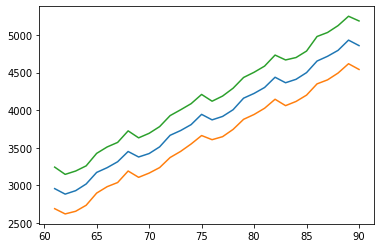

In [ ]:
import matplotlib.pyplot as plt
plt.plot(temp[-30:])
plt.show()

In [ ]:
from fbprophet import Prophet
def prophet_pred(dataset,typ,nxt=5):
  """
  This uses facebook prophet to forecast the time series.
  Ds and Y should be the only input
  Ds is dates in str type like "29 Apr 2020" or the general format yyyy:dd:mm hh:mm:ss and y is the thing to be predicted
  output is quite complex 
  the columns are - ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
  """
  dataset['ds']=dataset['dates']
  dataset['ds']=dataset['ds'].apply(lambda x :str(x))
  dataset=dataset[['ds','y']]
  m = Prophet(daily_seasonality=True,yearly_seasonality=False)
  m.fit(dataset)
  future = m.make_future_dataframe(periods=nxt)
  future.tail()
  forecast = m.predict(future)
  forecast=forecast[['yhat','yhat_lower','yhat_upper']]
  if typ=='log' or typ=='dlog':
    forecast['yhat']=forecast['yhat'].apply(lambda x : np.exp(x))
    forecast['yhat_lower']=forecast['yhat_lower'].apply(lambda x : np.exp(x))
    forecast['yhat_upper']=forecast['yhat_upper'].apply(lambda x : np.exp(x))
  return forecast
  

